# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [ ]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 93.9MB/s]
Archive:  traffic-dataset.zip
replace Traffic Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler





In [299]:
#Lodaing the dataset , then i wil set the Date_TIme as column index
df=pd.read_csv('/content/Traffic Data.csv',parse_dates=['date_time'],index_col='date_time')

#herei will show the first five rows
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,Mist,mist
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,Clear,sky is clear
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,Clear,sky is clear
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,Clear,sky is clear


In [300]:
#i will show the shape of the data
df.shape

(20000, 7)

In [301]:
#i will show information about the dataset
df.info ()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2017-08-27 01:00:00 to 2018-05-31 18:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [302]:
#here i will show describe on dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
traffic_volume,19980.0,3278.186887,1977.171357,113.00,1228.75,3430.000,4928.00,16781.00
temp,20000.0,281.162680,12.661288,243.39,271.95,281.825,291.84,310.07
rain_1h,20000.0,0.048396,0.398007,0.00,0.00,0.000,0.00,10.60
snow_1h,20000.0,0.000000,0.000000,0.00,0.00,0.000,0.00,0.00
clouds_all,20000.0,49.384600,39.647341,0.00,1.00,75.000,90.00,92.00


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [303]:
#i will check for null vlaues
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


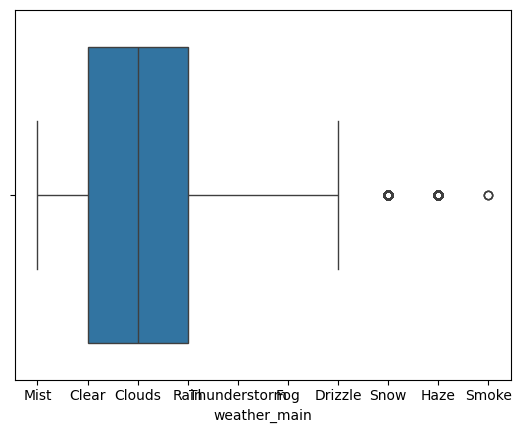

In [304]:
#i will do visulaztion on weather maine
sns.boxplot(x=df['weather_main'])
plt.show()

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [305]:
#her i will handel missing vlaue first
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [306]:
#here i filled the missing vlaue in traffic_volum
df['traffic_volume'].fillna(df['traffic_volume'].mean(), inplace=True)

In [307]:
#here i will check one more time on misssing vlaues
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


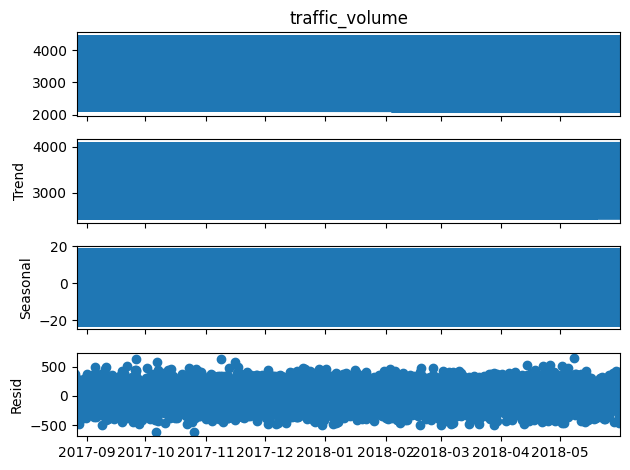

In [370]:
#here after i cleand the traffic_volum from null data i did the sesonal plot on traffic volum
periodl=50
result = seasonal_decompose(df["traffic_volume"], model='additive',period=periodl)

result.plot()
plt.show()



In [314]:
#here i will label encoding the object column

label_encoder = LabelEncoder()

df['weather_main'] = label_encoder.fit_transform(df['weather_main'])
df['weather_description'] = label_encoder.fit_transform(df['weather_description'])
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2017-08-27 01:00:00,1209.0,291.15,0.0,0.0,90,5,16
2018-09-06 23:00:00,1248.0,286.01,0.0,0.0,1,0,25
2017-08-25 18:00:00,4602.0,293.69,0.0,0.0,75,1,1
2017-11-09 22:00:00,2838.0,262.35,0.0,0.0,1,0,25
2017-11-09 15:00:00,5794.0,267.08,0.0,0.0,5,0,25


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [324]:
#here i i will start shfifting the trafiic volum and creat new column calld prev_traffic_volume
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)
df['prev_traffic_volume'] = df['traffic_volume'].shift(10)

# Moving Averages
df['traffic_volume'] = df['traffic_volume'].rolling(window=7).mean()
df['traffic_volume'] = df['traffic_volume'].rolling(window=30).mean()
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,prev_traffic_volume
date_time,,,,,,,,
2017-08-27 01:00:00,NaN,291.15,0.0,0.0,90,5,16,NaN
2018-09-06 23:00:00,NaN,286.01,0.0,0.0,1,0,25,NaN
2017-08-25 18:00:00,NaN,293.69,0.0,0.0,75,1,1,NaN
2017-11-09 22:00:00,NaN,262.35,0.0,0.0,1,0,25,NaN
2017-11-09 15:00:00,NaN,267.08,0.0,0.0,5,0,25,NaN


In [326]:
#now i will fill the missing value in the new column
df['prev_traffic_volume'].fillna(df['prev_traffic_volume'].mean(), inplace=True)
df['traffic_volume'].fillna(df['traffic_volume'].mean(), inplace=True)

df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,prev_traffic_volume
date_time,,,,,,,,
2017-08-27 01:00:00,3277.803173,291.15,0.0,0.0,90,5,16,3277.972773
2018-09-06 23:00:00,3277.803173,286.01,0.0,0.0,1,0,25,3277.972773
2017-08-25 18:00:00,3277.803173,293.69,0.0,0.0,75,1,1,3277.972773
2017-11-09 22:00:00,3277.803173,262.35,0.0,0.0,1,0,25,3277.972773
2017-11-09 15:00:00,3277.803173,267.08,0.0,0.0,5,0,25,3277.972773


In [327]:
#now i will use resampling to resample the data so it can give me better vlaues later
df_resa = df.resample('D').mean()
df_resampled = df_resa.interpolate()

df_resampled.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,prev_traffic_volume
date_time,,,,,,,,
2016-11-18,3277.080251,273.582500,0.0,0.0,85.000000,6.000000,12.050000,3936.400000
2016-11-19,3263.754762,271.048333,0.0,0.0,53.666667,2.708333,16.375000,3828.791667
2016-11-20,3253.869643,269.565000,0.0,0.0,36.500000,0.541667,17.416667,2460.291667
2016-11-21,3288.990079,271.654583,0.0,0.0,6.041667,0.125000,24.750000,3276.541667
2016-11-22,3266.079275,274.069423,0.0,0.0,81.442308,5.365385,15.519231,3194.288462


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [331]:
#now i will spliting the data to prepare it for model
#here i used the df_resample becuse no need to back to old data set df

#i gaive the data rotaition so it can have the size that will be traind
train_size = int(0.8 * len(df_resampled))

#here the data has been split into train and test
train = df_resampled[:train_size]
test = df_resampled[train_size:]



## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [332]:
#here i will do scaler for the data befor start modeling
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [333]:
#here i will create founction continane create_dataset to prepare dataset for the modeling
def create_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0:dataset.shape[1]]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [334]:
#here i called the methoud create_dataset and adjust it to trained data and test data with time_step 10
time_step = 10
X_train, Y_train = create_dataset(train_scaled,time_step)
X_test, y_test = create_dataset(test_scaled,time_step)

In [335]:
#befor moving to modeling i will check for the traine and teset shape
X_test.shape

(126, 10, 8)

In [336]:
y_test.shape

(126,)

In [337]:
X_train.shape

(534, 10, 8)

In [338]:
Y_train.shape

(534,)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [339]:
#create model 1 LSTM
#here i called the methoud
Lstm = Sequential()
#give the model input layer
Lstm.add(LSTM(100, activation='relu',return_sequences=True, input_shape=(X_train.shape[1], 8)))
#hiddin layer
Lstm.add(LSTM(100, activation='relu'))
#output layer
Lstm.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [340]:
#next i will do compling the model
Lstm.compile(loss='mean_squared_error',optimizer='adam')

In [341]:
#i will print summry for the model
Lstm.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_29 (LSTM)                       │ (None, 10, 100)             │          43,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_30 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 124,101 (484.77 KB)

 Trainable params: 124,101 (484.77 KB)

 Non-trainable params: 0 (0.00 B)

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [342]:
#now i will fit the model
Lstm.fit(X_train, Y_train, epochs=50, batch_size=20, validation_data=(X_test, y_test))

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.1081 - val_loss: 0.0392
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0320 - val_loss: 0.0443
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0283 - val_loss: 0.0411
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0303 - val_loss: 0.0395
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0323 - val_loss: 0.0431
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0355 - val_loss: 0.0394
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0325 - val_loss: 0.0378
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0320 - val_loss: 0.0430
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0313 - val_loss: 0.0391
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0319 - val_loss: 0.0380
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0316 - val_loss: 0.0428
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [343]:
#here i will prdeict the model on x_test
prediction = Lstm.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [344]:
#here i will print the model evealuation
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 0.1608141656642425
MSE: 0.04020662036924504
RMSE: 0.2005158855782879


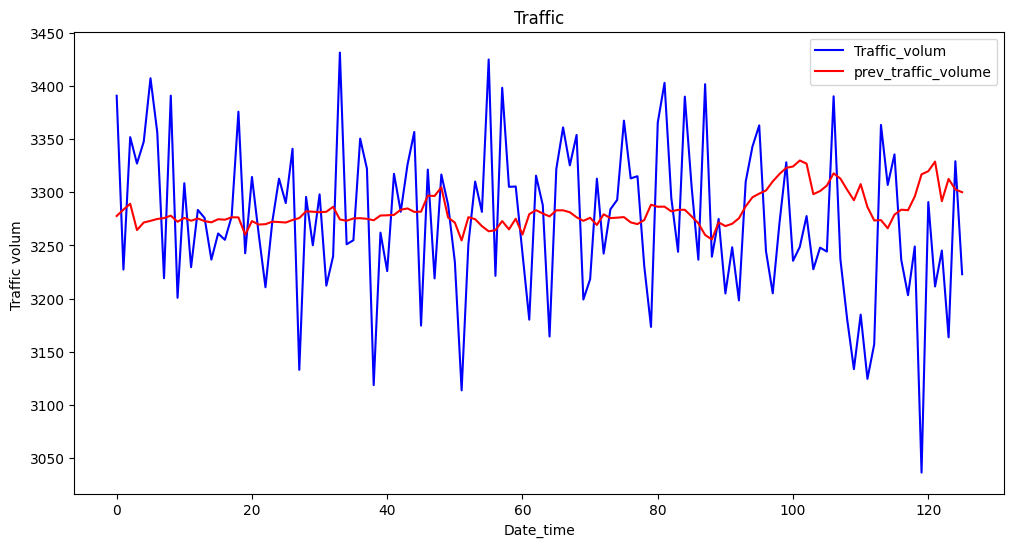

In [345]:
#here i will used sclaer invers so i can check the result form the plo
predictions_rescaled = scaler.inverse_transform(np.concatenate((prediction, np.zeros((prediction.shape[0], 7))), axis=1))[:, 0]
Y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 7))), axis=1))[:, 0]

#here i will prin the plot
plt.figure(figsize=(12,6))
plt.plot(Y_test_rescaled, label='Traffic_volum ', color='blue')
plt.plot(predictions_rescaled, label='prev_traffic_volume', color='red')
plt.title('Traffic')
plt.xlabel('Date_time')
plt.ylabel('Traffic volum ')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [346]:
#here i used stander scaler to check with GRU
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [347]:
#here i will create founction continane create_dataset to prepare dataset for the modeling
def create_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0:dataset.shape[1]]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [348]:
#here i call the methoud and give time stamp deffrint numper with GRU model
time_step = 20
Xtrain, Ytrain = create_dataset(train_scaled,time_step)
Xtest, ytest = create_dataset(test_scaled,time_step)

In [357]:
#here i will use the GRU model

#here i called the methoud
GRu = Sequential()
#i give the model input layer
GRu.add(GRU(30, activation='relu', return_sequences=True, input_shape=(Xtrain.shape[1], 8)))
#i add hiddin layer
GRu.add(GRU(30, activation='relu'))
#here i add output layer
GRu.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [358]:
#here i will coplile the model
GRu.compile(loss='mean_squared_error',optimizer='adam')

In [359]:
#i will print model summry
GRu.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_29 (GRU)                         │ (None, 20, 30)              │           3,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_30 (GRU)                         │ (None, 30)                  │           5,580 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,211 (35.98 KB)

 Trainable params: 9,211 (35.98 KB)

 Non-trainable params: 0 (0.00 B)

In [360]:
#i will fit the model
GRu.fit(Xtrain, Ytrain, epochs=100, batch_size=10, validation_data=(Xtest, ytest))

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 1.0276 - val_loss: 1.1761
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.9874 - val_loss: 1.1802
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.9574 - val_loss: 1.1653
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.9543 - val_loss: 1.1740
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.0095 - val_loss: 1.1807
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.9330 - val_loss: 1.1832
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.9857 - val_loss: 1.1633
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.9693 - val_loss: 1.1743
Epoch 9/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.9909 - val_loss: 1.1735
Epoch 10/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.0871 - val_loss: 1.1974
Epoch 11/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.0113 - val_loss: 1.2551
Epoch 12/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [362]:
#i made 2 prediction on xtest and xtrain
predicted_test = GRu.predict(X_test)
Predict_train = GRu.predict(X_train)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [363]:
print(predicted_test)
print(Predict_train)

[[ 0.5084123 ]
 [ 0.53404784]
 [ 0.6249555 ]
 [ 0.39090574]
 [ 0.6349436 ]
 [ 0.56356174]
 [ 0.4719698 ]
 [ 0.61607593]
 [ 0.41014552]
 [-0.01247916]
 [ 0.3870097 ]
 [ 0.43358752]
 [ 0.48869047]
 [ 0.7244047 ]
 [ 0.6534714 ]
 [ 0.6538682 ]
 [ 0.7274549 ]
 [ 0.67135656]
 [ 0.39044893]
 [ 0.7248347 ]
 [ 0.83832306]
 [ 0.63651866]
 [ 0.72798586]
 [ 0.8115961 ]
 [ 0.6590751 ]
 [ 0.31678578]
 [ 0.3287991 ]
 [ 0.2687392 ]
 [ 0.96202487]
 [ 0.9503014 ]
 [ 1.0439074 ]
 [ 1.1292248 ]
 [ 0.8327    ]
 [ 0.51222575]
 [ 0.5183065 ]
 [ 1.03566   ]
 [ 0.71159345]
 [ 0.5575681 ]
 [ 0.79184026]
 [ 0.94078845]
 [ 0.54292774]
 [ 0.6483088 ]
 [ 0.727752  ]
 [ 0.877856  ]
 [ 1.0633488 ]
 [ 0.85540783]
 [ 0.96487886]
 [ 0.63518965]
 [ 0.58295816]
 [ 0.42560163]
 [ 0.9101536 ]
 [ 0.7895523 ]
 [ 0.8669726 ]
 [ 0.8386453 ]
 [ 0.6836334 ]
 [ 0.60823417]
 [ 0.22315654]
 [ 0.41319343]
 [ 0.38129938]
 [ 0.42428732]
 [ 0.6079298 ]
 [ 0.78262657]
 [ 0.62172925]
 [ 0.3975657 ]
 [ 0.5140058 ]
 [ 0.66804045]
 [ 0.84242

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [364]:
print('MAE:', mean_absolute_error(y_test, predicted_test))
print('MSE:', mean_squared_error(y_test, predicted_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predicted_test)))

MAE: 0.25786637248761735
MSE: 0.09710623958542881
RMSE: 0.3116187407480956


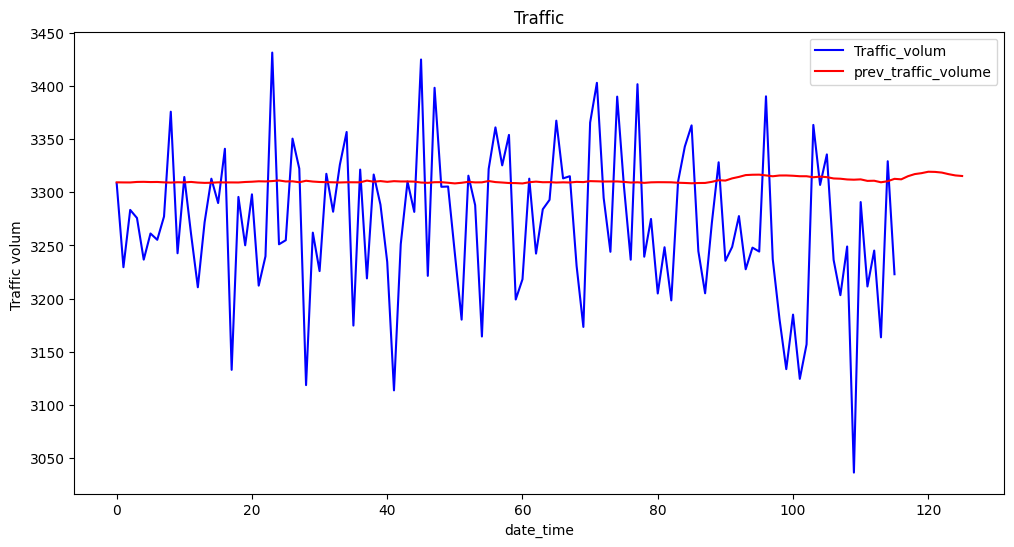

In [365]:
#now i will print the plot
predictions_rescaled = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 7))), axis=1))[:, 0]
Y_test_rescaled = scaler.inverse_transform(np.concatenate((ytest.reshape(-1, 1), np.zeros((ytest.shape[0], 7))), axis=1))[:, 0]

#here i will prin the plot
plt.figure(figsize=(12,6))
plt.plot(Y_test_rescaled, label='Traffic_volum ', color='blue')
plt.plot(predictions_rescaled, label='prev_traffic_volume', color='red')
plt.title('Traffic')
plt.xlabel('date_time')
plt.ylabel('Traffic volum ')
plt.legend()
plt.show()


## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

1-Data processing is important becuse you can't work with missing values or outliers or objects it will effecit your result and your model result so you need to clean and the data and make sure every thing is clear befor working on your model

2-i used shifting on Traffic volum so i can deal with it in model so i add new column call prev_trafiic_volum and i calend it from non so i can use it in my model

3-first the data wasent compliecatied so i used with LSTM and GRU one input one hiddin layer with diffrint ephocs of both just to see how the model will procees the result and i used LSTM and GRU model theres not big deffrince in bettwen them in the process but they are better than RNN

4-at first model LSTM i used 20 batch size and i proceesd the data then i run the data agine with 10 bath size and i didn't see big deffrince bettwen them so i used in GRU model 10 batch size , the ideia of batch size is how much will tranning the model

5-with time serise i understand that it's better to check for loose if you want to make sure your model is learning , so every time the ose of your model decresid the better the model will predict

6-i didn't do it  

7-i didn't make the under fitting and overfitting sampling

8-it's might the model do better predict if i add overfiting sampling becuse sampling help the model predict better , and i can add more ehpoce to see how the model will process with more ephoce also i can test the batch size and choose more than 20 batch , and i can use the reshape it will help the model in predciton and give it accurit prediciton